In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import NearestNeighbors

#### Example 1

In [11]:
data = {'name':            ['rahim', 'bhupen', 'raja', 'gaba', 'kiran', 'kia', 'jalebi'],
        'salary':          [80,       60,       45,     120,     30,     45,     55], 
        'expenses':        [70,       30,       40,     67,      25,     15,     54],
        'attitude':        ['Risky', 'Saving', 'Risky', 'Saving','Risky','Saving','Risky']
       }

In [12]:
df = pd.DataFrame(data)
df

,name,salary,expenses,attitude
0,rahim,80,70,Risky
1,bhupen,60,30,Saving
2,raja,45,40,Risky
3,gaba,120,67,Saving
4,kiran,30,25,Risky
5,kia,45,15,Saving
6,jalebi,55,54,Risky


In [13]:
train_samples = df[['salary', 'expenses']].values

In [14]:
test_customer = np.array([[34, 23]])

In [15]:
def compute_neigh_distances(training_samples_arr, test_vector):
    neigh_dist_arr = np.sqrt(np.sum(np.power((training_samples_arr - test_vector), 2), axis=1))
    
    return neigh_dist_arr

In [16]:
import heapq

In [17]:
plt.style.use('ggplot')

In [18]:
test_customer[0][1]

23

In [22]:
compute_neigh_distances(train_samples, test_customer)

array([65.76473219, 26.92582404, 20.24845673, 96.60227741,  4.47213595,
       13.60147051, 37.44329045])

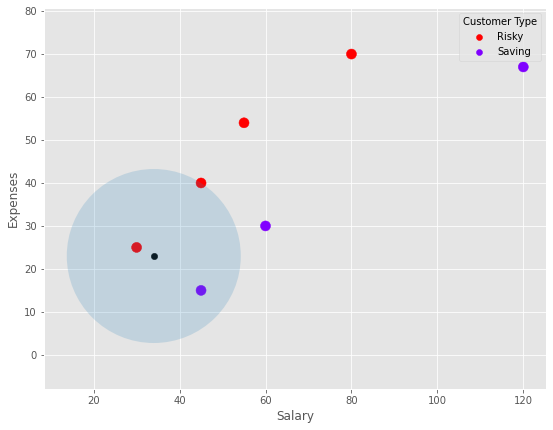

In [25]:
plt.figure(figsize=(9, 7))

ax = plt.gca()
ax.axis('equal')

attitude_type = ['Risky', 'Saving']

# plot all training samples
scatter = ax.scatter(x = df.salary, 
                     y = df.expenses, 
                     c = df.attitude.astype('category').cat.codes,
                     cmap ='rainbow_r',
                     s = 100
                   )
# # add legend to the plot with names
ax.legend(handles= scatter.legend_elements()[0], 
           labels = attitude_type,
           title  = "Customer Type")

# # plot test customer
ax.scatter( x=test_customer[0][0], 
            y=test_customer[0][1], 
            c='k',
            s=40
           )

# # get distances from all the neighbors
neigh_distances = compute_neigh_distances(train_samples, test_customer)

# # get kth nearest neighbor
k = 3
radius = heapq.nsmallest(k, neigh_distances)[k-1]

ax.add_patch(plt.Circle(test_customer.ravel(), 
                        radius, 
                        alpha=0.2, 
                        zorder=1))
plt.xlabel('Salary')
plt.ylabel('Expenses');

#### Example 3

In [14]:
from sklearn.datasets import make_blobs

In [15]:
n_classes = 3

X, y = make_blobs(n_samples=50, 
                  centers=3, 
                  n_features=2,
                  cluster_std=0.5,
                  center_box=(-5, 5),
                  random_state=0)

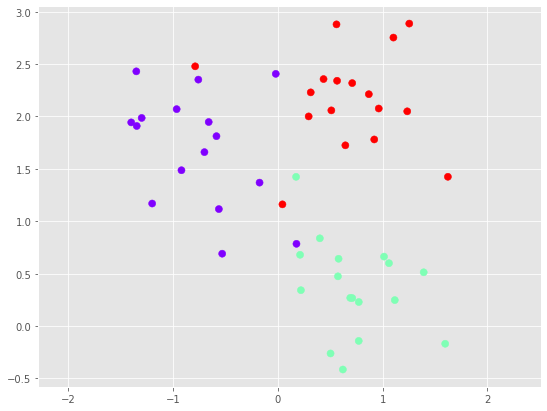

In [16]:
plt.figure(figsize=(9, 7))

ax = plt.gca()
ax.axis('equal')

# plot all training samples
scatter = plt.scatter(  X[:, 0], 
                        X[:, 1], 
                        c= y, 
                        cmap ='rainbow_r',
                        s = 50);

In [17]:
from ipywidgets import interact, interactive, interactive_output, IntSlider, Layout, interact_manual
from ipywidgets import AppLayout, Button, Layout, HBox, Label, VBox, Text
import ipywidgets as widgets
from IPython.display import display

In [18]:
def compute_neigh_distances(training_samples_arr, test_vector):
    neigh_dist_arr = np.sqrt(np.sum(np.power((training_samples_arr - test_vector), 2), axis=1))
    
    return neigh_dist_arr

In [19]:
def model_gen(n_neighbors, X_col, Y_col ):  
    
    plt.figure(figsize=(9, 7))

    ax = plt.gca()
    ax.axis('equal')

    # plot all training samples
    scatter = plt.scatter(  X[:, 0], 
                            X[:, 1], 
                            c= y, 
                            cmap ='rainbow_r',
                            s = 50);
    
    # plot test customer
    ax.scatter( x=X_col, 
                y=Y_col, 
                c='k',
                s=40
               )
    
    test_customer = np.array([X_col, Y_col])
    
    # get distances from all the neighbors
    neigh_distances = compute_neigh_distances(X, test_customer)

    # get kth nearest neighbor
    k = n_neighbors

    radius = heapq.nsmallest(k, neigh_distances)[k-1]

    ax.add_patch(plt.Circle((X_col, Y_col), 
                            radius, 
                            alpha=0.2, 
                            zorder=1))
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.show();

In [20]:
n_neighbors= widgets.IntSlider(min=1, 
                               max=19, 
                               step=1, 
                               value=int(1), 
                               continuous_update=False, 
                               orientation='horizontal')

In [21]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [22]:
# generate a test point
X_col = widgets.FloatSlider(min  =x_min, 
                            max  =x_max, 
                            step =(x_max- x_min)/20, 
                            value=(x_max+ x_min)/2, 
                            continuous_update=False, 
                            orientation='horizontal')

Y_col = widgets.FloatSlider(min  =y_min, 
                            max  =y_max, 
                            step =(y_max- y_min)/20, 
                            value=(y_max+ y_min)/2, 
                            continuous_update=False, 
                            orientation='horizontal')

out = interactive_output(model_gen, {"n_neighbors": n_neighbors, 
                                     "X_col": X_col,
                                     "Y_col": Y_col})

slider1 = HBox([widgets.Label('Neighbors:'), n_neighbors])

box1 = VBox([slider1])

test_point_slider_col1 = HBox([widgets.Label('X column : '), X_col])
test_point_slider_col2 = HBox([widgets.Label('Y Column : '), Y_col])

test_point_box = VBox([test_point_slider_col1, test_point_slider_col2])

params = HBox([box1 ])

ui = VBox([params, test_point_box])

display(ui, out)

Output()